# K-Means Clustering Tutorial: World Happiness Report 2019

## Introduction
In this tutorial, we'll explore the application of K-Means clustering on the World Happiness Report 2019 dataset. The dataset contains happiness scores and various contributing factors for different countries. By applying K-Means clustering, we aim to identify groups of countries with similar characteristics and gain insights into global happiness patterns.

## Table of Contents
1. Loading the Dataset
2. Data Preprocessing
3. Implementing K-Means Clustering
4. Choosing the Optimal Number of Clusters
5. Visualizing the Clusters
6. Interpreting and Analyzing the Clusters
7. Evaluating Clustering Performance
8. Predictions and Insights

## 1. Loading the Dataset

In [1]:
import pandas as pd

# Load the World Happiness Report 2019 dataset
happiness_data = pd.read_csv("2019.csv")

In [2]:
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
happiness_data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## 2. Data Preprocessing

In [5]:
happiness_data['Country or region'].nunique()

156

In [6]:
# Store the feature names before dropping columns
training_columns = happiness_data.columns[3:]

In [7]:
# Drop the 'Country or region' column
happiness_data.drop('Country or region', axis=1, inplace=True)

# Drop the 'Overall rank' column
happiness_data.drop('Overall rank', axis=1, inplace=True)

# Drop the 'Score' column because this is an unsupervised learning problem
happiness_data.drop('Score', axis=1, inplace=True)

In [8]:
happiness_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


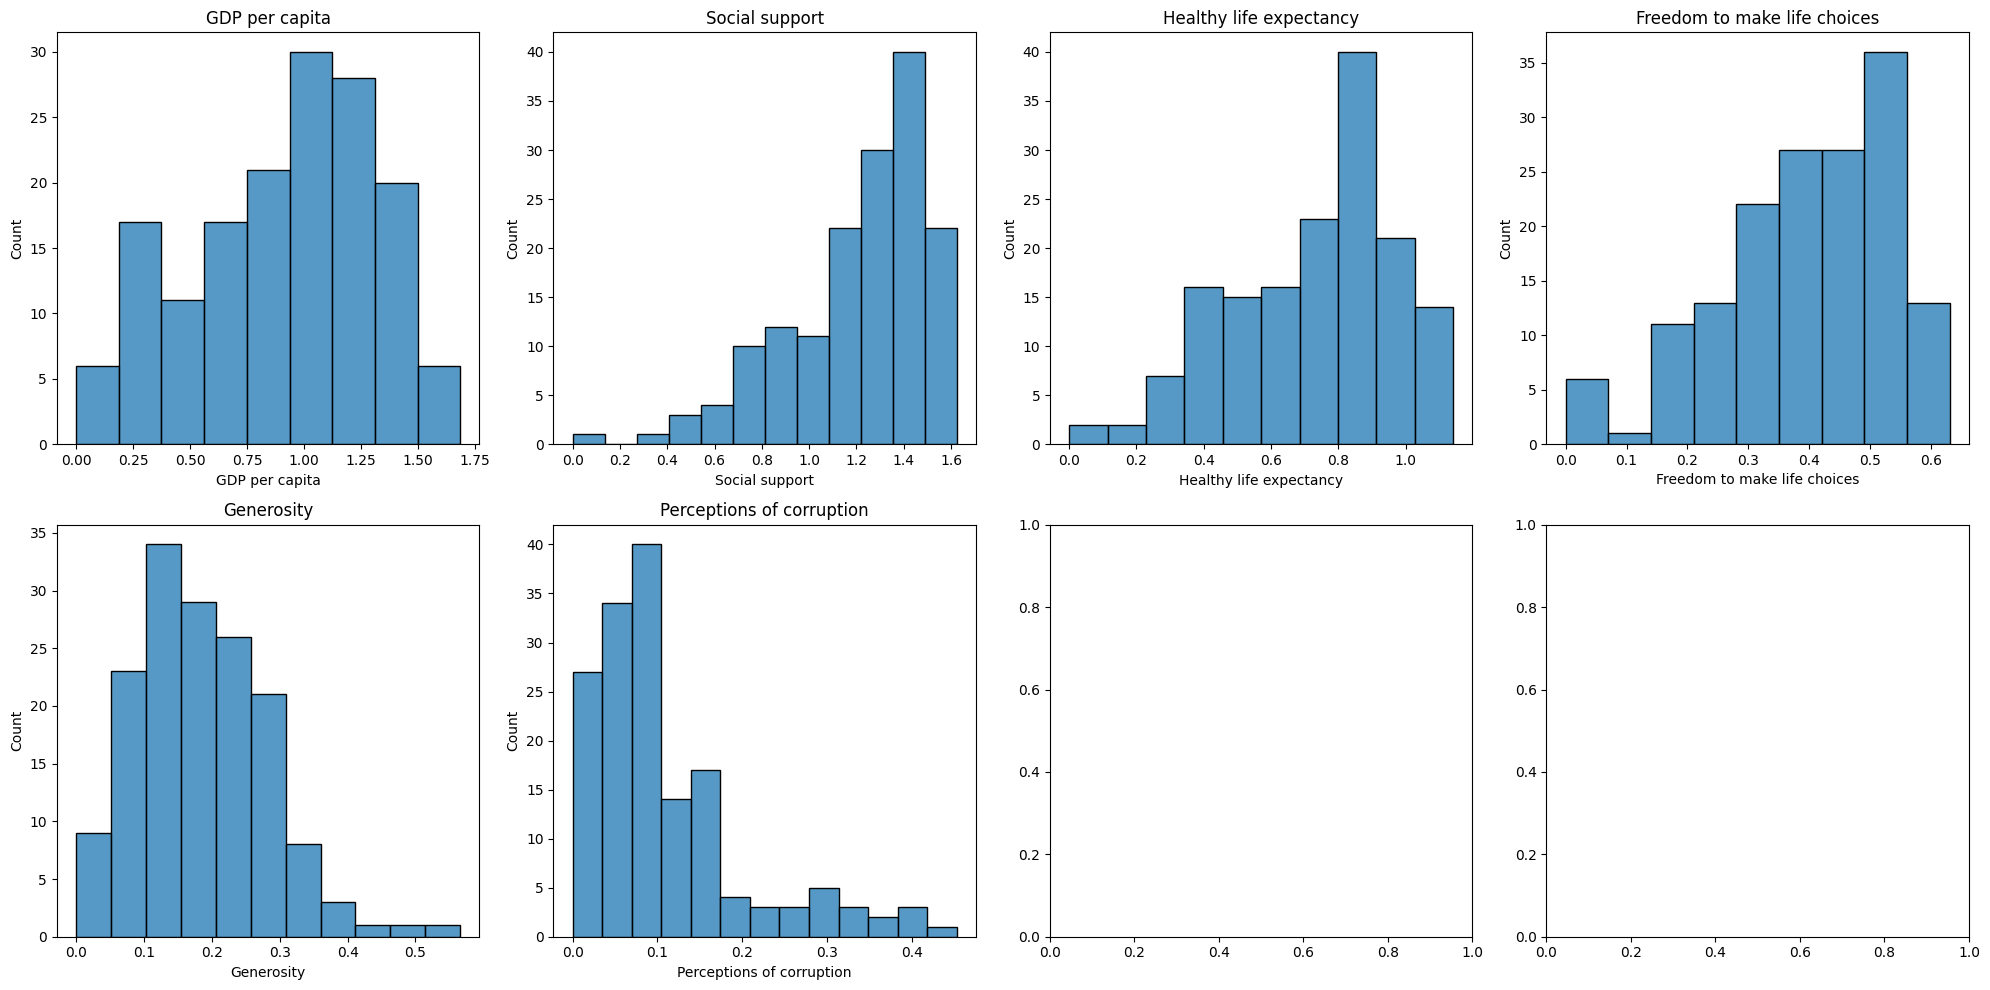

In [9]:
# Distribution of each of the variables to determine scaling
import matplotlib.pyplot as plt
import seaborn as sns

# Plot barplot for each of the variables with sns
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(happiness_data.columns, ax.flatten()):
    sns.histplot(happiness_data[variable], ax=subplot)
    subplot.set_title(variable)
plt.tight_layout()
plt.show()

All variables look non-guassian, so we'll apply MinMaxScaler to scale the data to the range [0, 1].

In [10]:
happiness_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


In [11]:
# Scale rest of the variables with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
happiness_data = scaler.fit_transform(happiness_data)

## 3. Implementing K-Means Clustering

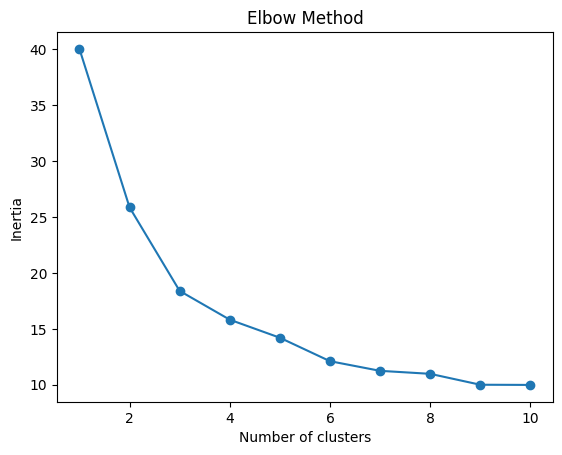

In [12]:
# Find optimal number of clusters using the elbow method

from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Create a range of k values to test
k_values = range(1, 11)

# Fit the KMeans model for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(happiness_data)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against k values with sns
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

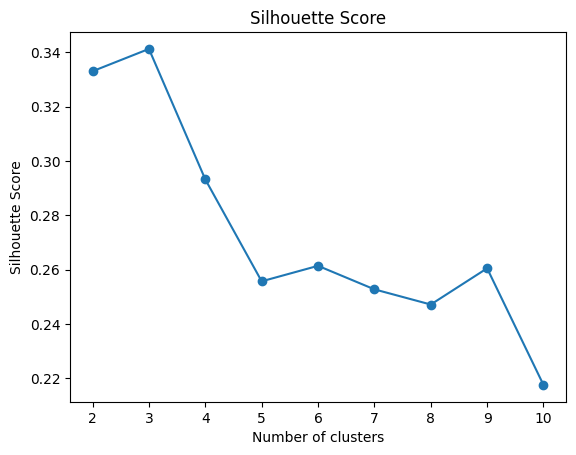

In [13]:
# Plot the silhouette score for each k value
from sklearn.metrics import silhouette_score

# Create an empty list to store the silhouette scores
silhouette_scores = []

# Create a range of k values to test
k_values = range(2, 11)

# Fit the KMeans model for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(happiness_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(happiness_data, labels))

# Plot the silhouette scores against k values
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [14]:
# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(happiness_data)

KMeans(n_clusters=3, random_state=42)

In [15]:
# Turn happiness_data back into a DataFrame
happiness_data = pd.DataFrame(happiness_data, columns=training_columns)

# Add the 'Cluster' column to the DataFrame
happiness_data['Cluster'] = kmeans.labels_

In [16]:
# Add the cluster labels to the dataset
# happiness_data['Cluster'] = kmeans.labels_

## 4. Visualizing the Clusters

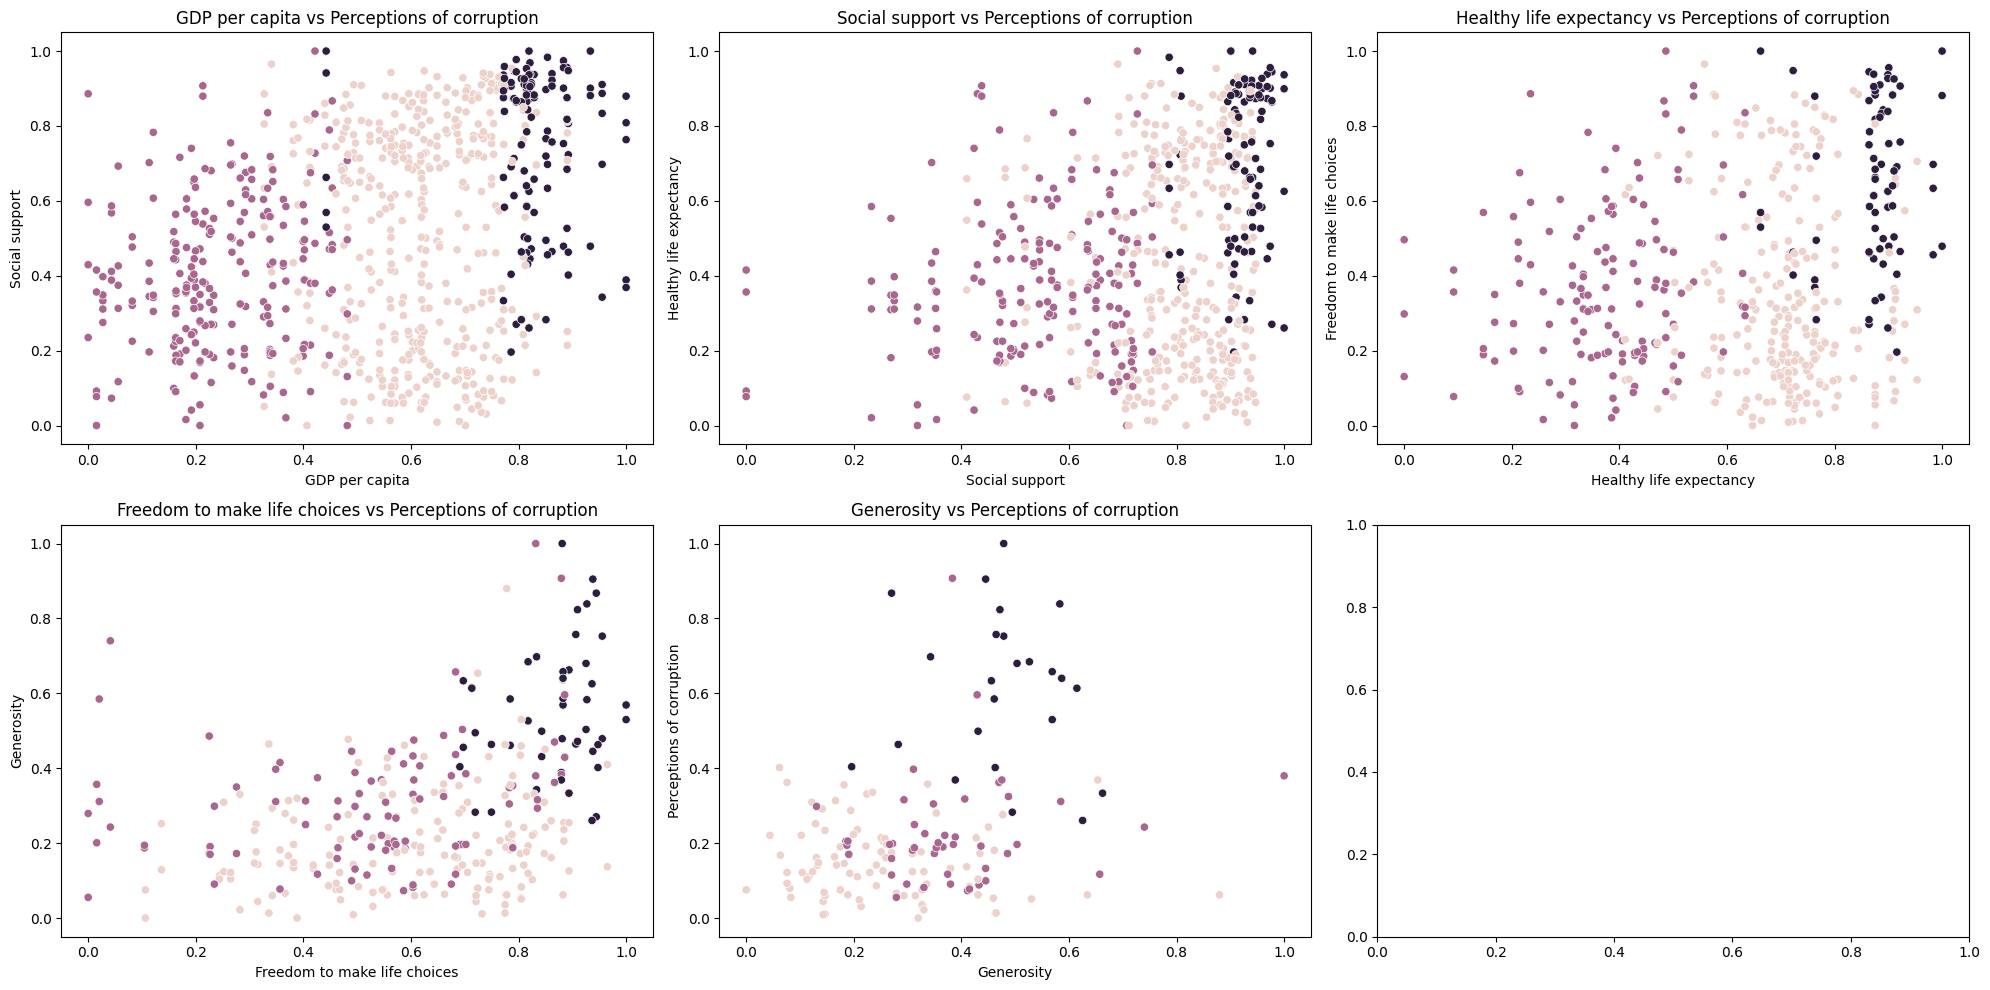

In [17]:
# Visualize the clusters for all the variables in pairs except 'Cluster'
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
variables = happiness_data.columns[:-1]  # Exclude 'Cluster'
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        subplot = ax[i // 3, i % 3]
        sns.scatterplot(x=variables[i], y=variables[j], data=happiness_data, hue='Cluster', ax=subplot, legend=False)
        subplot.set_title(f"{variables[i]} vs {variables[j]}")
plt.tight_layout()
plt.show()

## 5. Interpreting and Analyzing the Clusters

In [18]:
# Cluster sizes
happiness_data['Cluster'].value_counts()

Cluster
0    86
1    46
2    24
Name: count, dtype: int64

In [19]:
# Cluster characteristics
happiness_data.groupby('Cluster').mean()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Cluster,,,,,,
0,0.615319,0.806128,0.711361,0.614160,0.255321,0.151496
1,0.241131,0.537227,0.371699,0.512506,0.383123,0.225645
2,0.826678,0.919925,0.870070,0.860869,0.473572,0.611663


In [20]:
# Give each cluster a name
cluster_names = {
    0: 'Low Happiness',
    1: 'Medium Happiness',
    2: 'High Happiness'
}

# Map the cluster names to the 'Cluster' column
happiness_data['Cluster'] = happiness_data['Cluster'].map(cluster_names)

In [21]:
happiness_data.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Cluster'],
      dtype='object')

## 6. Predictions and Insights

In [22]:
# Predict the cluster for a new data point
new_country = pd.DataFrame({
    'GDP per capita': [1.5],
    'Social support': [1.2],
    'Healthy life expectancy': [0.8],
    'Freedom to make life choices': [0.7],
    'Generosity': [0.3],
    'Perceptions of corruption': [0.1]
}, columns=training_columns)

# Reorder the features in new_country to match the training data
new_country = new_country[training_columns]

In [23]:
print("Training columns: ", training_columns)
print("New country columns: ", new_country.columns)

Training columns:  Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
New country columns:  Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [24]:
new_country.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.5,1.2,0.8,0.7,0.3,0.1


In [25]:
happiness_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550,High Happiness
1,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077,High Happiness
2,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759,High Happiness
3,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486,High Happiness
4,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837,High Happiness


In [26]:
new_country_scaled = scaler.transform(new_country)
predicted_cluster = kmeans.predict(new_country_scaled)
print(f"Predicted Happiness for the new country: {cluster_names[predicted_cluster[0]]}")

Predicted Happiness for the new country: High Happiness
